In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [71]:
t, om1, T21, om2, T22, A1, A2 = sp.symbols('t omega_1 T_21 omega_2 T_22 A_1 A_2', real=True)


In [72]:
Q = A1*sp.exp(-t/T21)*sp.exp(sp.I*om1*t) + A2*sp.exp(-t/T22)*sp.exp(sp.I*om2*t)
var_lst = [A1, A2, T21, T22, om1, om2]
dQ = 0
for var in var_lst:
    dQ += sp.diff(Q, var)
sp.simplify(dQ)

I*A_1*t*exp(I*omega_1*t - t/T_21) + A_1*t*exp(I*omega_1*t - t/T_21)/T_21**2 + I*A_2*t*exp(I*omega_2*t - t/T_22) + A_2*t*exp(I*omega_2*t - t/T_22)/T_22**2 + exp(I*omega_1*t - t/T_21) + exp(I*omega_2*t - t/T_22)

In [86]:
Q2 = (Q * sp.conjugate(Q)).expand()
print(Q2)

A_1**2*exp(-2*t/T_21) + A_1*A_2*exp(-t/T_21)*exp(-t/T_22)*exp(I*omega_1*t)*exp(-I*omega_2*t) + A_1*A_2*exp(-t/T_21)*exp(-t/T_22)*exp(-I*omega_1*t)*exp(I*omega_2*t) + A_2**2*exp(-2*t/T_22)


In [85]:
(sp.Abs(Q)**2).expand()

A_1**2*exp(-2*t/T_21) + A_1*A_2*exp(-t/T_21)*exp(-t/T_22)*exp(I*omega_1*t)*exp(-I*omega_2*t) + A_1*A_2*exp(-t/T_21)*exp(-t/T_22)*exp(-I*omega_1*t)*exp(I*omega_2*t) + A_2**2*exp(-2*t/T_22)

In [84]:
print(sp.diff(Q2, om2))

-I*A_1*A_2*t*exp(-t/T_21)*exp(-t/T_22)*exp(I*omega_1*t)*exp(-I*omega_2*t) + I*A_1*A_2*t*exp(-t/T_21)*exp(-t/T_22)*exp(-I*omega_1*t)*exp(I*omega_2*t)


In [115]:
def gradient_descent(t, y, lr=0.01, n_iter=1000):
    """
    Gradient descent for y = A1 exp(t(-1/T21+i om1)) + A2 exp(t(-1/T22+i om2))
    """
    N = len(t)
    A1, A2, T21, T22, om1, om2 = 1, 1, 10, 10, 1, 1.1

    for i in range(n_iter):
        y_pred = A1**2*np.exp(-2*t/T21) + A1*A2*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(1j*om1*t)*np.exp(-1j*om2*t) + A1*A2*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(-1j*om1*t)*np.exp(1j*om2*t) + A2**2*np.exp(-2*t/T22)
        error = y - y_pred

        dA1 = np.abs(-(2/N) * np.sum(2*A1*np.exp(-2*t/T21) + A2*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(1j*om1*t)*np.exp(-1j*om2*t) + A2*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(-1j*om1*t)*np.exp(1j*om2*t) * error))
        dA2 = np.abs(-(2/N) * np.sum(A1*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(1j*om1*t)*np.exp(-1j*om2*t) + A1*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(-1j*om1*t)*np.exp(1j*om2*t) + 2*A2*np.exp(-2*t/T22) * error))
        dT21 = np.abs(-(2/N) * np.sum((2*A1**2*t*np.exp(-2*t/T21)/T21**2 + A1*A2*t*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(1j*om1*t)*np.exp(-1j*om2*t)/T21**2 + A1*A2*t*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(-1j*om1*t)*np.exp(1j*om2*t)/T21**2) * error))
        dT22 = np.abs(-(2/N) * np.sum((A1*A2*t*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(1j*om1*t)*np.exp(-1j*om2*t)/T22**2 + A1*A2*t*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(-1j*om1*t)*np.exp(1j*om2*t)/T22**2 + 2*A2**2*t*np.exp(-2*t/T22)/T22**2) * error))
        dom1 = np.abs(-(2/N) * np.sum((1j*A1*A2*t*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(1j*om1*t)*np.exp(-1j*om2*t) - 1j*A1*A2*t*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(-1j*om1*t)*np.exp(1j*om2*t)) * error))
        dom2 = np.abs(-(2/N) * np.sum((-1j*A1*A2*t*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(1j*om1*t)*np.exp(-1j*om2*t) + 1j*A1*A2*t*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(-1j*om1*t)*np.exp(1j*om2*t)) * error))

        A1 -= lr * dA1
        A2 -= lr * dA2
        T21 -= lr * dT21
        T22 -= lr * dT22
        om1 -= lr * dom1
        om2 -= lr * dom2

        if i % 100 == 0:
            mse = np.mean(error**2)
            #print(f"iter {i:4d} | m={m:.4f}, b={b:.4f}, MSE={mse:.6f}")

    return A1, A2, T21, T22, om1, om2

In [117]:
A1, A2, T21, T22, om1, om2 = 1, 1, 10, 10, 1, 1.1

np.random.seed(0)
t = np.linspace(0,100,1000)
y = A1**2*np.exp(-2*t/T21) + A1*A2*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(1j*om1*t)*np.exp(-1j*om2*t) + A1*A2*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(-1j*om1*t)*np.exp(1j*om2*t) + A2**2*np.exp(-2*t/T22) + np.random.normal(0, 1e-8, size=len(t))

new_A1, new_A2, new_T21, new_T22, new_om1, new_om2 = gradient_descent(t, y, lr=0.01, n_iter=2000)

print(f"A1={new_A1}, A2={new_A2}, T21={new_T21}, T22={new_T22}, om1={new_om1}, om2={new_om2}")

A1=0.003767332243563513, A2=-0.0025336456657390405, T21=9.990116351653695, T22=9.988978158817524, om1=0.7665413789148205, om2=0.8665413789148222


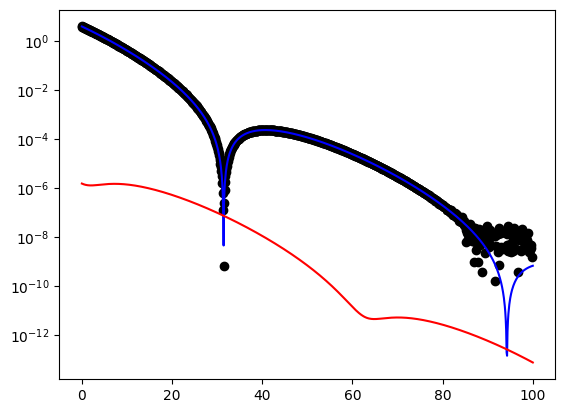

In [118]:
plt.semilogy(t, y, 'ko')
plt.semilogy(t, A1**2*np.exp(-2*t/T21) + A1*A2*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(1j*om1*t)*np.exp(-1j*om2*t) + A1*A2*np.exp(-t/T21)*np.exp(-t/T22)*np.exp(-1j*om1*t)*np.exp(1j*om2*t) + A2**2*np.exp(-2*t/T22), 'b-')
plt.semilogy(t, new_A1**2*np.exp(-2*t/new_T21) + new_A1*new_A2*np.exp(-t/new_T21)*np.exp(-t/new_T22)*np.exp(1j*new_om1*t)*np.exp(-1j*new_om2*t) + new_A1*new_A2*np.exp(-t/new_T21)*np.exp(-t/new_T22)*np.exp(-1j*new_om1*t)*np.exp(1j*new_om2*t) + new_A2**2*np.exp(-2*t/new_T22), 'r-')